# Iván Rendo Barreiro's M2 thesis
### Optimal allocation of attention in user-generated content platforms

In this notebook I am replicating (only) all the plots that appear in the final version of the thesis.

# Table of Contents
- [Set-up](#set-up) 
- [Section 2: general case](#general)
- [Section 2: binary case](#binary)
- [Appendix A.5.: quality distortion](#quality)
- [Section 3: utility ads](#uti)
- [Section 3: fixed p. ads](#fix)


# Set-up <a name="set-up"></a>

In [1]:
# Some nice libraries which I will need
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from numpy.lib.stride_tricks import as_strided
from sympy import *
from scipy.signal import savgol_filter
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.patches as mpatches

# A tiny collection of functions made for this thesis
import m2thesis as m2

For functions from M2 thesis: Be careful while interpreting one specific result. Numerical solutions are quite unestable.


# Section 2.1: General case <a name="general"></a>

In [3]:
thetas = np.linspace(0.01,0.99,30)
mu=0.1
expo = mu/(2*mu-1)
tot = sum(thetas**expo)
A_01 = thetas**expo / tot

mu=0.2
expo = mu/(2*mu-1)
tot = sum(thetas**expo)
A_02 = thetas**expo / tot

mu=0.25
expo = mu/(2*mu-1)
tot = sum(thetas**expo)
A_03 = thetas**expo / tot

mu=0.4
expo = mu/(2*mu-1)
tot = sum(thetas**expo)
A_04 = thetas**expo / tot

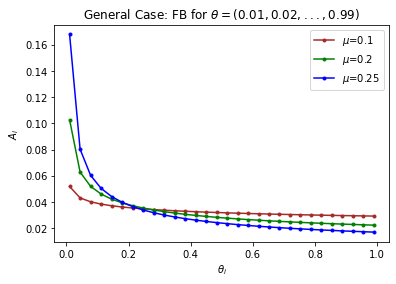

In [26]:
plt.plot(thetas,A_01, marker='.',label="$\mu$=0.1", color="brown");
plt.plot(thetas,A_02, marker='.',label="$\mu$=0.2", color="green");
plt.plot(thetas,A_03, marker='.',label="$\mu$=0.25", color="blue");
plt.legend();

plt.xlabel("$\\theta_i$");

plt.ylabel("$A_i$");
plt.title("General Case: FB for $\\theta=(0.01,0.02,...,0.99)$");

#plt.savefig('general_FB.svg', format='svg', dpi=1200);

# Section 2.2 and 2.3: Binary case <a name="binary"></a>

### Optimal qualities with respect to $\mu$

For this plot, although it is not important, the following parameters where used: $N_H=70$, $N_L=30$, $\theta_H = 0.8$, $\theta_L = 0.2$.

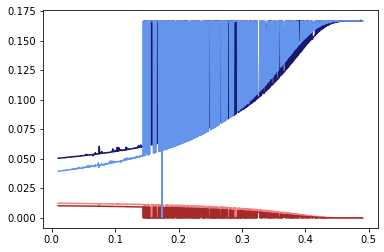

In [5]:
mu_v = np.linspace(0.01,0.49,1000)
FBh_v = []
SBh_v = []
FBl_v = []
SBl_v = []

for i in mu_v:
    sol_FB = m2.FB(pr =False, ret=True, mu=i,nH=70,nL=30) 
    sol_SB = m2.SB(pr =False, ret=True, mu=i,nH=70,nL=30) 
    FBh_v.append(sol_FB[1][4])
    FBl_v.append(sol_FB[1][5])
    SBh_v.append(sol_SB[1][4])
    SBl_v.append(sol_SB[1][5])

plt.plot(mu_v, FBh_v, 'lightcoral');
plt.plot(mu_v, SBh_v, 'brown');
plt.plot(mu_v, FBl_v, 'midnightblue');
plt.plot(mu_v, SBl_v, 'cornflowerblue');

Not convergent solutions are deleted and a filter is applied in order to remove the noise added by the unestability of the solutions (this is just cosmetic).

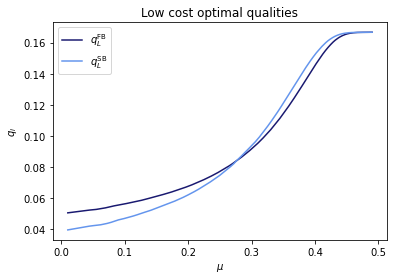

In [18]:
# tidying things

# for SBl_v, the min envelope seems a good curve of the real one
rSBl_v = []
mini=9999
for i in reversed(range(0,len(SBl_v))):
    if SBl_v[i] == 0.00014919506202170016:
        rSBl_v.append(mini)
    elif SBl_v[i]<mini:
        rSBl_v.append(SBl_v[i])
        mini = SBl_v[i]
    else:
        rSBl_v.append(mini)
rSBl_v=list(reversed(rSBl_v))

#plt.plot(rSBl_v);

# same for FBl_v
rFBl_v = []
mini=9999
for i in reversed(range(0,len(FBl_v))):
    if FBl_v[i]<mini:
        rFBl_v.append(FBl_v[i])
        mini = FBl_v[i]
    else:
        rFBl_v.append(mini)
rFBl_v=list(reversed(rFBl_v))

#plt.plot(rFBl_v);

rSBh_v = []
maxi=0
for i in reversed(range(0,len(SBh_v))):
    if SBl_v[i] == 0.021660350795272953:
        rSBh_v.append(maxi)
    if SBh_v[i]>maxi:
        rSBh_v.append(SBh_v[i])
        maxi = SBh_v[i]
    else:
        rSBh_v.append(maxi)
rSBh_v=list(reversed(rSBh_v))

#plt.plot(rSBh_v);


rFBh_v = []
maxi=0
for i in reversed(range(0,len(FBh_v))):
    if FBh_v[i]>maxi:
        rFBh_v.append(FBh_v[i])
        maxi = FBh_v[i]
    else:
        rFBh_v.append(maxi)
rFBh_v=list(reversed(rFBh_v))
#plt.plot(rFBh_v);

mu_v = np.linspace(0.01,0.49,1000)
rrFBl_v= savgol_filter(rFBl_v, 61, 1)
rrSBl_v= savgol_filter(rSBl_v, 61, 1)
plt.plot(mu_v,rrFBl_v, label="$q_L^{\mathrm{FB}}$", color="midnightblue");
plt.plot(mu_v,rrSBl_v, label="$q_L^{\mathrm{SB}}$", color="cornflowerblue");
plt.title("Low cost optimal qualities");
plt.xlabel("$\mu$");
plt.ylabel("$q_i$");
plt.legend(loc="upper left");

plt.savefig('low_cost_qualities.svg', format='svg', dpi=1200);

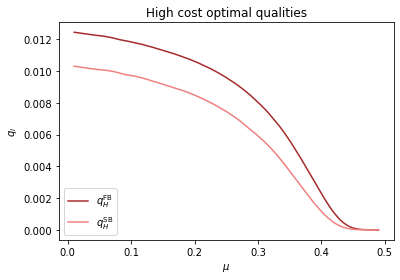

In [19]:
mu_v = np.linspace(0.01,0.49,1000)
rrFBh_v= savgol_filter(rFBh_v, 61, 1)
rrSBh_v= savgol_filter(rSBh_v, 61, 1)
plt.plot(mu_v,rrFBh_v, label="$q_H^{\mathrm{FB}}$", color="brown");
plt.plot(mu_v,rrSBh_v, label="$q_H^{\mathrm{SB}}$", color="lightcoral");
plt.title("High cost optimal qualities");
plt.xlabel("$\mu$");
plt.ylabel("$q_i$");
plt.legend(loc="lower left");

plt.savefig('high_cost_qualities.svg', format='svg', dpi=1200);

### Optimal attentions with respect to $\mu$

In [14]:
mu_v = np.linspace(0.01,0.49,1000)
AB_v = []
AH_v = []
lastH=0
lastB=0

for i in mu_v:
    sol_i = m2.FB(pr =False, ret=True, mu=i,nH=70,nL=30)
    if i<0.41:
        if sol_i[1][1]<0.0321:
            if sol_i[2]==True:
                AH_v.append(sol_i[1][0]) 
                AB_v.append(sol_i[1][1])
                lastH = sol_i[1][0]
                lastB = sol_i[1][1]
            else:
                AH_v.append(lastH) 
                AB_v.append(lastB)
        else:
            AH_v.append(lastH) 
            AB_v.append(lastB)
    else:
        if sol_i[2]==True:
            AH_v.append(sol_i[1][0]) 
            AB_v.append(sol_i[1][1])
            lastH = sol_i[1][0]
            lastB = sol_i[1][1]
        else:
            AH_v.append(lastH) 
            AB_v.append(lastB)

#fig, ax = plt.subplots()
#ax.stackplot(mu_v, AB_v, AH_v, colors =['c', 'lightcoral'],labels=["A_B(i)","A_H(i)"]);
#ax.legend(loc=[0.75,0.1]);
#ax.set_xlabel('$\mu$');
#ax.set_ylabel('Attention shares');
#ax.set_title('FB $A_i$ (by user), "realistic", Nh=70, nb=30');

A_FB_L = AB_v 
A_FB_H = AH_v



mu_v = np.linspace(0.01,0.49,1000)
AB_v = []
AH_v = []
lastH=0
lastB=0

for i in mu_v:
    sol_i = m2.SB(pr =False, ret=True, mu=i,nH=70,nL=30)
    if i<0.39:
        if sol_i[1][1]<0.031:
            if sol_i[2]==True:
                AH_v.append(sol_i[1][0]) 
                AB_v.append(sol_i[1][1])
                lastH = sol_i[1][0]
                lastB = sol_i[1][1]
            else:
                AH_v.append(lastH) 
                AB_v.append(lastB)
        else:
            AH_v.append(lastH) 
            AB_v.append(lastB)
    else:
        if sol_i[2]==True:
            AH_v.append(sol_i[1][0]) 
            AB_v.append(sol_i[1][1])
            lastH = sol_i[1][0]
            lastB = sol_i[1][1]
        else:
            AH_v.append(lastH) 
            AB_v.append(lastB)

#fig, ax = plt.subplots()
#ax.stackplot(mu_v, AB_v, AH_v, colors =['c', 'lightcoral'],labels=["A_B(i)","A_H(i)"]);
#ax.legend(loc=[0.75,0.1]);
#ax.set_xlabel('$\mu$');
#ax.set_ylabel('Attention shares');
#ax.set_title('SB $A_i$ (by user). "Realistic" Nh=70, nb=30');

A_SB_L = AB_v 
A_SB_H = AH_v

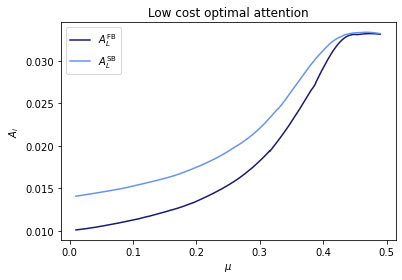

In [23]:
mu_v = np.linspace(0.01,0.49,1000)
rAFBL = []
rASBL = []
last = 0 
for i in range(len(mu_v)):
    if A_SB_L[i]==0.01138638169888555:
        rASBL.append(A_SB_L[i-2])
    elif A_SB_L[i]==0.0301461172068554:
        rASBL.append(A_SB_L[i-2])
    elif mu_v[i]<0.5:
        if A_SB_L[i]>0.0333:
            rASBL.append(last)
        else:
            rASBL.append(A_SB_L[i])
            last = A_SB_L[i]
    else:
        rASBL.append(A_SB_L[i])
        last = A_SB_L[i]
        
last = 0 
for i in range(len(mu_v)):
    if A_FB_L[i]==0.01138638169888555:
        rAFBL.append(A_FB_L[i-2])
    elif mu_v[i]<0.5:
        if A_SB_L[i]>0.0333:
            rAFBL.append(last)
        else:
            rAFBL.append(A_FB_L[i])
            last = A_FB_L[i]
    else:
        rAFBL.append(A_FB_L[i])
        last = A_FB_L[i]

yrAFBL = savgol_filter(rAFBL, 151, 2) # (filtered bc troubles with num. sol)")
yrASBL = savgol_filter(rASBL, 151, 2) # (filtered bc troubles with num. sol)")


#plt.plot(mu_v,rAFBL,label="FB");
#plt.plot(mu_v,rASBL,label="SB");
plt.plot(mu_v,yrAFBL,label="$A_L^{\mathrm{FB}}$", color="midnightblue");
plt.plot(mu_v,yrASBL,label="$A_L^{\mathrm{SB}}$",color="cornflowerblue");
plt.title("Low cost optimal attention");
plt.xlabel("$\mu$");
plt.ylabel("$A_i$");
plt.legend();

plt.savefig('low_cost_attention.svg', format='svg', dpi=1200);

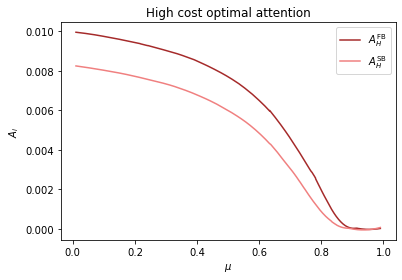

In [22]:
mu_v = np.linspace(0.01,0.99,1000)
A_SB_H2 = []
for i in range(len(A_SB_H)):
    if A_SB_L[i]==0.0301461172068554:
        A_SB_H2.append(A_SB_H[i-2])
    else:
        A_SB_H2.append(A_SB_H[i])
A_SB_H = A_SB_H2
#plt.plot(mu_v,A_FB_H,label="FB");
#plt.plot(mu_v,A_SB_H,label="SB");
yrAFBH = savgol_filter(A_FB_H, 151, 2) # (filtered bc troubles with num. sol)")
yrASBH = savgol_filter(A_SB_H, 201, 2) # (filtered bc troubles with num. sol)")
plt.plot(mu_v,yrAFBH,label="$A_H^{\mathrm{FB}}$", color="brown");
plt.plot(mu_v,yrASBH,label="$A_H^{\mathrm{SB}}$", color="lightcoral");
plt.title("High cost optimal attention");
plt.xlabel("$\mu$");
plt.ylabel("$A_i$");
plt.legend();

plt.savefig('high_cost_attention.svg', format='svg', dpi=1200);

### Loss of efficiency

In [30]:
mu_v = np.linspace(0.01,0.49,1000)
fb_v = []
sb_v = []
for i in mu_v:
    fb_v.append(m2.FB(mu=i, pr=0, ret=1)[0])
    sb_v.append(m2.SB(mu=i, pr=0, ret=1)[0])

In [31]:
fb_ok = []
maxi = 0
for i in reversed(range(len(mu_v))):
    if fb_v[i]> maxi:
        fb_ok.append(fb_v[i])
        maxi = fb_v[i]
    else:
        fb_ok.append(maxi)
fb_ok = list(reversed(fb_ok))

sb_ok = []
maxi = 0
for i in reversed(range(len(mu_v))):
    if sb_v[i]> maxi:
        sb_ok.append(sb_v[i])
        maxi = sb_v[i]
    else:
        sb_ok.append(maxi)
sb_ok = list(reversed(sb_ok))

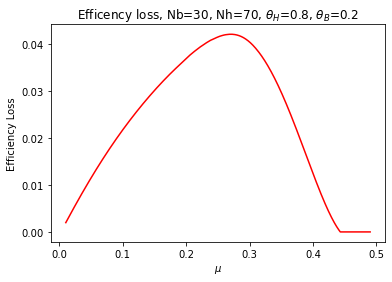

In [95]:
dif=(np.array(fb_ok)-np.array(sb_ok)) / np.array(fb_ok)
yhat = savgol_filter(dif, 751, 5) # (filtered bc troubles with num. sol)")
yhatt = []
yes=False
for i in yhat:
    if i<0:
        yes=True 
    if not yes:
        yhatt.append(i)
    if yes:
        yhatt.append(0)
#plt.plot(mu_v, dif, 'b');
plt.plot(mu_v, yhatt, 'r');
plt.title("Efficency loss, Nb=30, Nh=70, $\\theta_H$=0.8, $\\theta_B$=0.2");
plt.xlabel("$\mu$");
plt.ylabel("Efficiency Loss");
#plt.savefig('efficiency_loss.svg', format='svg', dpi=1200);

# Appendix A.5: Quality distortion <a name="quality"></a>

Needed symbols:

In [182]:
a0 = symbols("A_0")
a1 = symbols("A_1")
q0 = symbols("q_0")
q1 = symbols("q_1")
q0fb = symbols("q_0^{fb}")
eps = symbols("\\varepsilon")
t0 = symbols("\\theta_0")
t1 = symbols("\\theta_1")
mu = symbols("\\mu")
l = symbols("\\lambda")
N = symbols("N")
e = symbols("\\epsilon")

init_printing(use_latex=True)

Write the profit function in terms of $\varepsilon$ and the rest of parameters

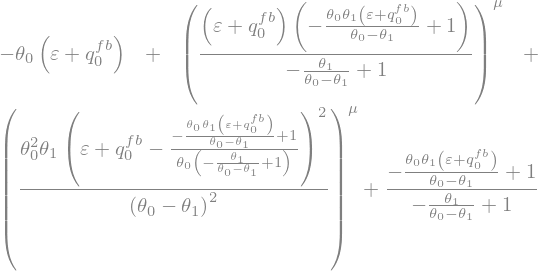

In [183]:
pol = (t1*t0)/(t0-t1)
aa0 = (1-pol*(q0fb+eps)) / (1-(t1/(t0-t1)))
aa1 = ((t1*t0)/(t0-t1)) * (q0fb + eps - a0/t0)
aa1 = aa1.subs(a0, aa0)
qq1 = aa1/t1

profit = a0 - q0*t0 + a1 - q1*t1 + (a1*q1)**mu + (a0*q0)**mu
profit = profit.subs(a1, aa1)
profit = profit.subs(a0, aa0)
profit = profit.subs(q1, qq1)
profit = profit.subs(q0, q0fb + eps)

profit

Substitute for $q_0^{fb}$ and derive the first order condition.

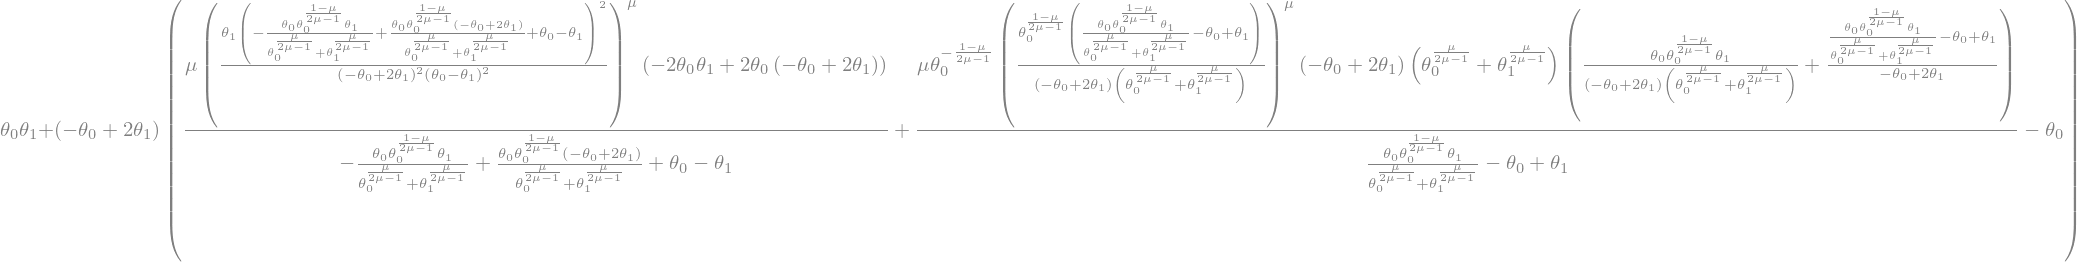

In [184]:
foc = diff(simplify(profit),eps)

numerator = fraction(foc)[0]
numerator=numerator.subs(eps,0)

q0fbb = (t0**((1-mu)/(2*mu-1))) / (t1**((mu)/(2*mu-1)) + t0**((mu)/(2*mu-1)))
numerator=numerator.subs(q0fb,q0fbb)
numerator

Give some values to $\theta_0$, $\theta_1$:

In [185]:
q0fbb = (t0**((1-mu)/(2*mu-1))) / (t1**((mu)/(2*mu-1)) + t0**((mu)/(2*mu-1)))
numerator=numerator.subs(q0fb,q0fbb)
numerator=numerator.subs(t1,0.015)
numerator=numerator.subs(t0,0.01)

Solve for $\mu^*$:

In [186]:
mu_star = nsolve(numerator, mu, 0.20) 
mu_star

Plot the first order condition in terms of $\mu$:

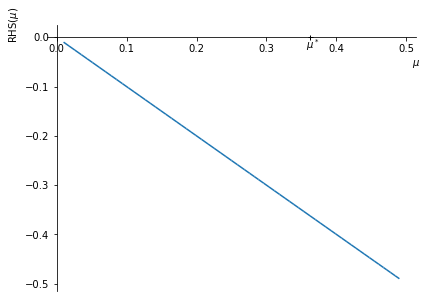

In [203]:
plot(numerator-mu,(mu, 0.01,0.49), xlabel="$\mu$", ylabel="RHS($\mu$)",markers=[{'args': [0.362347925323076, 0], 'color': "black", 'marker': "+", 'ms': 5}], annotations=[{'xy': (0.356, -0.000003), 'text': "$\mu^*$", 'ha': 'left', 'va': 'top', 'color': 'black'}]);

Check the second order condition (I have done this for tons of different values):

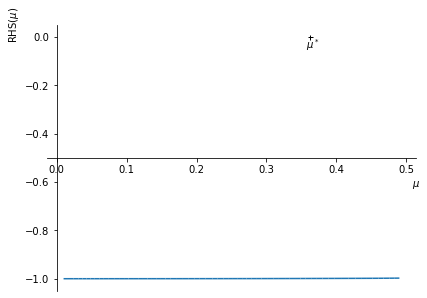

In [205]:
plot(diff(numerator-mu),(mu, 0.01,0.49), xlabel="$\mu$", ylabel="RHS($\mu$)",markers=[{'args': [0.362347925323076, 0], 'color': "black", 'marker': "+", 'ms': 5}], annotations=[{'xy': (0.356, -0.000003), 'text': "$\mu^*$", 'ha': 'left', 'va': 'top', 'color': 'black'}]);

In [188]:
soc = diff(fraction(foc)[0],eps)
q0fbb = (t0**((1-mu)/(2*mu-1))) / (t1**((mu)/(2*mu-1)) + t0**((mu)/(2*mu-1)))
soc=soc.subs(q0fb,q0fbb)
soc=soc.subs(t1,0.09)
soc=soc.subs(t0,0.05)

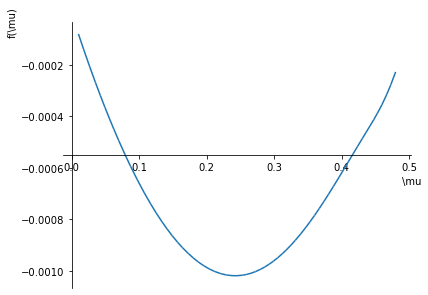

In [189]:
soc2=soc.subs(eps,-5.48)
plot(soc2,(mu, 0.01,0.48));

In [73]:
init_printing(use_latex=False)

# Section 3. Utility Ad-funded. <a name="uti"></a>

Optimal Attention in ads. Utility-based ads.

In [33]:
mu_v = np.linspace(0.01,0.49,1000)
SBh_v = []
SBl_v = []
adds  = []

for i in mu_v:
    sol_SB = m2.SB_ads(pr =False, ret=True, mu=i,nH=70,nL=30,theta_H=0.6, theta_L=0.4) 
    SBh_v.append(sol_SB[1][0])
    SBl_v.append(sol_SB[1][1])
    adds.append(sol_SB[1][6])

    
SBh_vr = []
for i in range(len(SBh_v)):
    if SBh_v[i]>1:
        SBh_vr.append(SBh_v[i-1])
    else:
        SBh_vr.append(SBh_v[i])

SBl_vr = []
for i in range(len(SBl_v)):
    if SBl_v[i]>1:
        SBl_vr.append(SBl_v[i-1])
    else:
        SBl_vr.append(SBl_v[i])
        
addsr = []
for i in range(len(adds)):
    if adds[i]>1:
        addsr.append(adds[i-1])
    else:
        addsr.append(adds[i])

mu_v = np.linspace(0.01,0.49,1000)
FBh_v = []
FBl_v = []
addsF  = []

for i in mu_v:
    sol_FB = m2.FB_ads(pr =False, ret=True, mu=i,nH=70,nL=30,theta_H=0.6, theta_L=0.4) 
    FBh_v.append(sol_FB[1][0])
    FBl_v.append(sol_FB[1][1])
    addsF.append(sol_FB[1][6])
    
newnew = 1/(1+2*mu_v)


Numerical solutions are unstable. The main objective of this code is to tidy them.

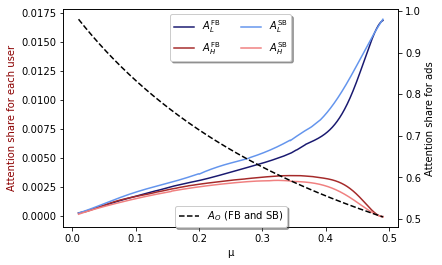

In [35]:
FBh_vr = []
last=0

for i in range(len(FBh_v)):
    if (i>400)&(i<700):
        if FBh_v[i]>0.0036:
            FBh_vr.append(last)
        elif FBh_v[i]<0.0022:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    elif (i>100)&(i<300):
        if FBh_v[i]>0.0026:
            FBh_vr.append(last)
        elif FBh_v[i]<0.0012:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    elif (i>300)&(i<400):
        if FBh_v[i]>0.005:
            FBh_vr.append(last)
        elif FBh_v[i]<0.002:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    elif (i>700)&(i<760):
        if FBh_v[i]>0.90031:
            FBh_vr.append(last)
        elif FBh_v[i]<0.0023:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    elif (i>760)&(i<800):
        if FBh_v[i]>0.0035:
            FBh_vr.append(last)
        elif FBh_v[i]<0.0025:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    elif (i>800):
        if FBh_v[i]>0.0039:
            FBh_vr.append(last)
        elif FBh_v[i]<0.00001:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    else:
        if FBh_v[i]>0.0031:
            FBh_vr.append(last)
        elif FBh_v[i]<0.0001:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
            
#plt.plot(mu_v, FBh_v, 'cornflowerblue');
FBh_vrr = savgol_filter(FBh_vr, 411, 6)
#plt.plot(mu_v, FBh_vr, 'darkblue');
#plt.plot(mu_v, FBh_vrr, 'red');






FBl_vr = []
last=0

for i in range(len(FBl_v)):
    if (i>500)&(i<700):
        if FBl_v[i]>0.0055:
            FBl_vr.append(last)
        elif FBl_v[i]<0.00172:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
            
    elif (i>400)&(i<500):
        if FBl_v[i]>0.004:
            FBl_vr.append(last)
        elif FBl_v[i]<0.0000172:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    elif (i>100)&(i<400):
        if FBl_v[i]>0.003:
            FBl_vr.append(last)
        elif FBl_v[i]<0.0012:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    elif (i>700)&(i<760):
        if FBl_v[i]>0.0125:
            FBl_vr.append(last)
        elif FBl_v[i]<0.00023:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    elif (i>760)&(i<800):
        if FBl_v[i]>0.0125:
            FBl_vr.append(last)
        elif FBl_v[i]<0.00025:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    elif (i>800)&(i<930):
        if FBl_v[i]>0.0125:
            FBl_vr.append(last)
        elif FBl_v[i]<0.000001:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    elif (i>930):
        if FBl_v[i]>0.90039:
            FBl_vr.append(last)
        elif FBl_v[i]<0.000001:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    else:
        if FBl_v[i]>0.002:
            FBl_vr.append(last)
        elif FBl_v[i]<0.0001:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
            
#plt.plot(mu_v, FBl_vr, 'cornflowerblue');
FBl_vrr = savgol_filter(FBl_vr, 511, 6)
#plt.plot(mu_v, FBl_vrr, 'darkred');


SBh_vr = []
last=0
for i in range(len(SBh_v)):
    if (i>400)&(i<800):
        if SBh_v[i]>0.0031:
            SBh_vr.append(last)
        elif SBh_v[i]<0.0021:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
    elif (i>300)&(i<400):
        if SBh_v[i]>0.0031:
            SBh_vr.append(last)
        elif SBh_v[i]<0.0012:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
    elif (i>800)&(i<900):
        if SBh_v[i]>0.0031:
            SBh_vr.append(last)
        elif SBh_v[i]<0.0010:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
    elif (i>950):
        if SBh_v[i]>0.0006:
            SBh_vr.append(last)
        elif SBh_v[i]<0.00001:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
    elif (i>900)&(i<950):
        if SBh_v[i]>0.00075:
            SBh_vr.append(last)
        elif SBh_v[i]<0.00001:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
    
    elif (i>40)&(i<300):
        if SBh_v[i]>0.0031:
            SBh_vr.append(last)
        elif SBh_v[i]<0.00015:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
    else:
        if SBh_v[i]>0.0031:
            SBh_vr.append(last)
        elif SBh_v[i]<0.0001:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
        

SBh_vrr = savgol_filter(SBh_vr, 611, 6)
#plt.plot(mu_v, SBh_v, 'blue');
#plt.plot(mu_v, SBh_vr, 'brown');
#plt.plot(mu_v, SBh_vrr, 'pink');





SBl_vr = []
last=0
for i in range(len(SBl_v)):
    if (i>400)&(i<600):
        if SBl_v[i]>0.006:
            SBl_vr.append(last)
        elif SBl_v[i]<0.002:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>600)&(i<700):
        if SBl_v[i]>0.009:
            SBl_vr.append(last)
        elif SBl_v[i]<0.0045:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>700)&(i<800):
        if SBl_v[i]>0.009:
            SBl_vr.append(last)
        elif SBl_v[i]<0.0055:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>300)&(i<400):
        if SBl_v[i]>0.005:
            SBl_vr.append(last)
        elif SBl_v[i]<0.0002:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>800)&(i<900):
        if SBl_v[i]>0.012:
            SBl_vr.append(last)
        elif SBl_v[i]<0.005:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>900)&(i<970):
        if SBl_v[i]>0.015:
            SBl_vr.append(last)
        elif SBl_v[i]<0.0082:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>970):
        if SBl_v[i]>0.915:
            SBl_vr.append(last)
        elif SBl_v[i]<0.00082:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>40)&(i<300):
        if SBl_v[i]>0.0075:
            SBl_vr.append(last)
        elif SBl_v[i]<0.0002:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    else:
        if SBl_v[i]>0.90031:
            SBl_vr.append(last)
        elif SBl_v[i]<0.0001:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
        

SBl_vrr = savgol_filter(SBl_vr, 411, 4)
#plt.plot(mu_v, SBl_v, 'darkgreen');
#plt.plot(mu_v, SBl_vr, 'red');
#plt.plot(mu_v, SBl_vrr, 'blue');



fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(mu_v, FBl_vrr, 'midnightblue', label="$A_L^\mathrm{FB}$");
ax1.plot(mu_v, FBh_vrr, 'brown', label="$A_H^\mathrm{FB}$");
ax1.plot(mu_v, SBl_vrr, 'cornflowerblue', label="$A_L^\mathrm{SB}$");
ax1.plot(mu_v, SBh_vrr, 'lightcoral', label="$A_H^\mathrm{SB}$");



newnew = 1/(2*mu_v +1)

ax2.plot(mu_v, newnew, 'black', linestyle='--', label="$A_O$ (FB and SB)");
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
          ncol=2, fancybox=True, shadow=True);
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 0.12),
          ncol=3, fancybox=True, shadow=True);

ax1.set_ylabel('Attention share for each user', color='darkred');
ax2.set_ylabel('Attention share for ads', color='black');
ax1.set_xlabel('µ');

plt.savefig('ads_utility_based.svg', format='svg', dpi=1200);
plt.show();

**Qualities plots**

In [16]:
mu_v = np.linspace(0.01,0.49,1000)
SBh_v = []
SBl_v = []
adds  = []

for i in mu_v:
    sol_SB = m2.SB_ads(pr =False, ret=True, mu=i,nH=70,nL=30,theta_H=0.6, theta_L=0.4) 
    SBh_v.append(sol_SB[1][4])
    SBl_v.append(sol_SB[1][5])
    
mu_v = np.linspace(0.01,0.49,1000)
FBh_v = []
FBl_v = []

for i in mu_v:
    sol_FB = m2.FB_ads(pr =False, ret=True, mu=i,nH=70,nL=30,theta_H=0.6, theta_L=0.4) 
    FBh_v.append(sol_FB[1][4])
    FBl_v.append(sol_FB[1][5])

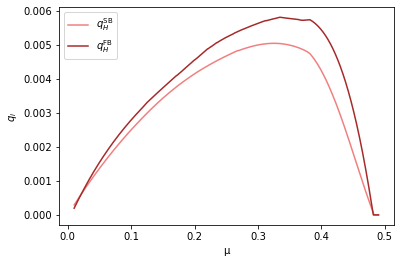

In [31]:
SBh_vr = []
last=0

for i in range(len(FBl_v)):
    if (i>400)&(i<850):
        if SBh_v[i]>0.0051:
            SBh_vr.append(last)
        elif SBh_v[i]<0.0025:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
    elif (i>200)&(i<400):
        if SBh_v[i]>0.005:
            SBh_vr.append(last)
        elif SBh_v[i]<0.002:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
    elif (i>930)&(i<960):
        if SBh_v[i]>0.002:
            SBh_vr.append(last)
        elif SBh_v[i]<0.000001:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
    elif (i>960):
        if SBh_v[i]>0.001:
            SBh_vr.append(last)
        elif SBh_v[i]<0.000001:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
    else:
        if SBh_v[i]>0.005:
            SBh_vr.append(last)
        elif SBh_v[i]<0.0001:
            SBh_vr.append(last)
        else:
            SBh_vr.append(SBh_v[i])
            last = SBh_v[i]
            
#plt.plot(mu_v, FBh_v, 'cornflowerblue');
SBh_vrr = savgol_filter(SBh_vr, 451, 5)
#plt.plot(mu_v, FBl_v, 'darkred');


FBh_vr = []
last=0

for i in range(len(FBl_v)):
    if (i>400)&(i<900):
        if FBh_v[i]>0.05:
            FBh_vr.append(last)
        elif FBh_v[i]<0.0045:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    elif (i>50)&(i<200):
        if FBh_v[i]>0.005:
            FBh_vr.append(last)
        elif FBh_v[i]<0.001:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    elif (i>200)&(i<300):
        if FBh_v[i]>0.005:
            FBh_vr.append(last)
        elif FBh_v[i]<0.002:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    elif (i>300)&(i<400):
        if FBh_v[i]>0.005:
            FBh_vr.append(last)
        elif FBh_v[i]<0.0035:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    elif (i>960):
            FBh_vr.append(0)
    elif (i>900)&(i<960):
        if FBh_v[i]>0.005:
            FBh_vr.append(last)
        elif FBh_v[i]<0.0001:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
    else:
        if FBh_v[i]>0.005:
            FBh_vr.append(last)
        elif FBh_v[i]<0.0007:
            FBh_vr.append(last)
        else:
            FBh_vr.append(FBh_v[i])
            last = FBh_v[i]
            

            
            
SBh_vrr = savgol_filter(SBh_vr, 451, 4)   
FBh_vrr = savgol_filter(FBh_vr, 451, 4)

for i in range(len(SBh_vrr)):
    if SBh_vrr[i]<0:
        SBh_vrr[i]=0
    if FBh_vrr[i]<0:
        FBh_vrr[i]=0

#plt.plot(mu_v, FBh_vr, 'brown');
plt.plot(mu_v, SBh_vrr, 'lightcoral', label="$q_H^\mathrm{SB}$");
plt.plot(mu_v, FBh_vrr, 'brown',label="$q_H^\mathrm{FB}$");

#plt.plot(mu_v, FBh_v, 'red');
#plt.plot(mu_v, FBh_vr, 'blue');

plt.legend()
#plt.title("Qualities of the high cost type");
plt.xlabel("µ");
plt.ylabel("$q_i$");

#plt.savefig('qualities_ads_uh.svg', format='svg', dpi=1200);

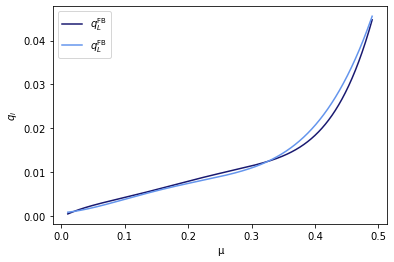

In [27]:
FBl_vr=[]
last=0
for i in range(len(FBl_v)):
    if (i>600)&(i<920):
        if FBl_v[i]>0.03:
            FBl_vr.append(last)
        elif FBl_v[i]<0.005:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    elif (i>920)&(i<960):
        if FBl_v[i]>0.037:
            FBl_vr.append(last)
        elif FBl_v[i]<0.0002:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    elif (i>400)&(i<600):
        if FBl_v[i]>0.011:
            FBl_vr.append(last)
        elif FBl_v[i]<0.005:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    elif (i>200)&(i<400):
        if FBl_v[i]>0.01:
            FBl_vr.append(last)
        elif FBl_v[i]<0.002:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    elif (i>930):
        if FBl_v[i]>0.9005:
            FBl_vr.append(last)
        elif FBl_v[i]<0.000001:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
    else:
        if FBl_v[i]>0.007:
            FBl_vr.append(last)
        elif FBl_v[i]<0.0000001:
            FBl_vr.append(last)
        else:
            FBl_vr.append(FBl_v[i])
            last = FBl_v[i]
            
#plt.plot(mu_v, FBh_v, 'cornflowerblue');

#plt.plot(mu_v, FBl_v, 'blue');
#plt.plot(mu_v, FBl_vr, 'darkred');



SBl_vr=[]

for i in range(len(SBl_v)):
    if (i>600)&(i<800):
        if SBl_v[i]>0.02:
            SBl_vr.append(last)
        elif SBl_v[i]<0.005:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>800)&(i<900):
        if SBl_v[i]>0.03:
            SBl_vr.append(last)
        elif SBl_v[i]<0.01:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>400)&(i<600):
        if SBl_v[i]>0.011:
            SBl_vr.append(last)
        elif SBl_v[i]<0.005:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>200)&(i<400):
        if SBl_v[i]>0.015:
            SBl_vr.append(last)
        elif SBl_v[i]<0.002:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    elif (i>930):
        if SBl_v[i]>0.9005:
            SBl_vr.append(last)
        elif SBl_v[i]<0.01:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
            
    elif SBl_v[i]==0.000744508015613343:
        SBl_vr.append(last)
    else:
        if SBl_v[i]>0.9005:
            SBl_vr.append(last)
        elif SBl_v[i]<0.0003:
            SBl_vr.append(last)
        else:
            SBl_vr.append(SBl_v[i])
            last = SBl_v[i]
    
            
#plt.plot(mu_v, FBh_v, 'cornflowerblue');


SBl_vrr = savgol_filter(SBl_vr, 999, 5)
FBl_vrr = savgol_filter(FBl_vr, 999, 5)


plt.plot(mu_v, FBl_vrr, 'midnightblue', label="$q_L^\mathrm{FB}$");
#plt.plot(mu_v, SBl_v, 'cornflowerblue');
#plt.plot(mu_v, FBl_vrr, 'blue');
plt.plot(mu_v, SBl_vrr, 'cornflowerblue', label="$q_L^\mathrm{FB}$");
plt.legend()
#plt.title("Qualities of the low cost type");
plt.xlabel("µ");
plt.ylabel("$q_i$");
#plt.savefig('qualities_ads_ul.svg', format='svg', dpi=1200);

# Section 3. Fixed price Ad-funded. <a name="fix"></a>

In [37]:
def payoffs(A0=0.5, mu=0.3, nh=50, nl=50, th=0.8, tl=0.2, Umin=0, Umax = 40):
    AH = (1-A0)/((nl*(tl/th)**(mu/(2*mu-1)))*((nh/nl)**(1/(2*mu-1))))
    AL = (1-A0)/((nh*(th/tl)**(mu/(2*mu-1)))*((nl/nh)**(1/(2*mu-1))))
    qH = AH/th
    qL = AL/tl
    N = nl+nh
    
    payoff__ = nh*(AH*qH)**mu + nl*(AL*qL)**mu
    if payoff__>Umax:
        exp_payoff = N*A0
    elif payoff__<Umin:
        exp_payoff = 0
    else:
        prob = ((payoff__-Umin)/(Umax-Umin))
        exp_payoff = N*A0*prob
    return(exp_payoff)

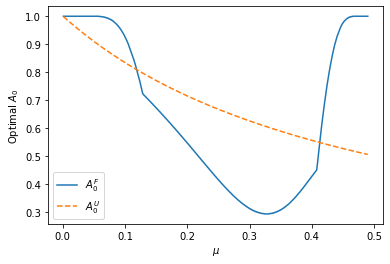

In [41]:
Umaxx=30
Uminn=10
muv = np.linspace(0.001,0.49,1000)
A0max=[]
for i in muv:
    A0v = np.linspace(0.001,0.999,1000)
    pays=[]
    for j in A0v:
        pays.append(payoffs(A0=j,mu=i,Umax=Umaxx, Umin=Uminn))
    max_item = max(pays)
    ind = pays.index(max_item)
    A0max.append(A0v[ind])
    
ad0 = 1/(2*muv+1)
plt.plot(muv,A0max, label="$A_0^F$");
plt.plot(muv,ad0,linestyle="--", label="$A_0^U$");
plt.legend()
plt.ylabel("Optimal $A_0$")
plt.xlabel("$\mu$")

plt.savefig('attention_fixed.svg', format='svg', dpi=1200);